In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
data = pd.read_csv('bank_sim.csv')
data.head()



,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [2]:
print("Unique zipCodeOri values: ",data.zipcodeOri.nunique())
print("Unique zipMerchant values: ",data.zipMerchant.nunique())
# dropping zipcodeori and zipMerchant since they have only one unique value
data_reduced = data.drop(['zipcodeOri','zipMerchant'],axis=1)

Unique zipCodeOri values:  1
Unique zipMerchant values:  1


In [3]:
data_reduced.columns

Index(['step', 'customer', 'age', 'gender', 'merchant', 'category', 'amount',
       'fraud'],
      dtype='object')

In [4]:
# turning object columns type to categorical for easing the transformation process
col_categorical = data_reduced.select_dtypes(include= ['object']).columns
for col in col_categorical:
    data_reduced[col] = data_reduced[col].astype('category')
# categorical values ==> numeric values
data_reduced[col_categorical] = data_reduced[col_categorical].apply(lambda x: x.cat.codes)
data_reduced.head(5)

,step,customer,age,gender,merchant,category,amount,fraud
0,0,210,4,2,30,12,4.55,0
1,0,2753,2,2,30,12,39.68,0
2,0,2285,4,1,18,12,26.89,0
3,0,1650,3,2,30,12,17.25,0
4,0,3585,5,2,30,12,35.72,0


In [5]:
X = data_reduced.drop(['fraud'],axis=1)
y = data['fraud']
print(X.head(),"\n")
print(y.head())

   step  customer  age  gender  merchant  category  amount
0     0       210    4       2        30        12    4.55
1     0      2753    2       2        30        12   39.68
2     0      2285    4       1        18        12   26.89
3     0      1650    3       2        30        12   17.25
4     0      3585    5       2        30        12   35.72 

0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64


In [6]:
#Number of Fraud cases 
y[y==1].count()

7200

In [7]:
#Number of non fraud cases
y[y==0].count()

587443

In [8]:
data_fraud_0 = data_reduced[data_reduced['fraud'] == 0]
data_fraud_1 = data_reduced[data_reduced['fraud'] == 1]

# Check the size of each subset
print("Size of data_fraud_0:", data_fraud_0.shape)
print("Size of data_fraud_1:", data_fraud_1.shape)
# Display first few rows of each subset to verify
print("First few rows of data_fraud_0:\n", data_fraud_0.head())
print("First few rows of data_fraud_1:\n", data_fraud_1.head())

Size of data_fraud_0: (587443, 8)
Size of data_fraud_1: (7200, 8)
First few rows of data_fraud_0:
    step  customer  age  gender  merchant  category  amount  fraud
0     0       210    4       2        30        12    4.55      0
1     0      2753    2       2        30        12   39.68      0
2     0      2285    4       1        18        12   26.89      0
3     0      1650    3       2        30        12   17.25      0
4     0      3585    5       2        30        12   35.72      0
First few rows of data_fraud_1:
      step  customer  age  gender  merchant  category  amount  fraud
88      0      3219    3       2        34         4   44.26      1
89      0       723    3       2        34         4  324.50      1
434     0       362    3       2        44         6  176.32      1
435     0      4040    3       2        44         6  337.41      1
553     0       969    4       1         2        14  220.11      1


In [9]:
from sklearn.model_selection import train_test_split
# Assuming your dataset is already loaded into a DataFrame called data_reduced
# data_reduced = pd.read_csv('path_to_your_csv_file.csv')

# Separate the data based on the fraud column
data_fraud_0 = data_reduced[data_reduced['fraud'] == 0]
data_fraud_1 = data_reduced[data_reduced['fraud'] == 1]

# Split the fraud=0 data into train (60%), temp (40%)
train_fraud_0, temp_fraud_0 = train_test_split(data_fraud_0, test_size=0.4, random_state=42)

# Split the temp data into cross-validation (50% of temp, i.e., 20% of original fraud=0) and test (50% of temp, i.e., 20% of original fraud=0)
cv_fraud_0, test_fraud_0 = train_test_split(temp_fraud_0, test_size=0.5, random_state=42)

# Split the fraud=1 data into cross-validation (50%) and test (50%)
cv_fraud_1, test_fraud_1 = train_test_split(data_fraud_1, test_size=0.5, random_state=42)

# Combine splits to create final train, cross-validation, and test sets
train_set = train_fraud_0
cv_set = pd.concat([cv_fraud_0, cv_fraud_1])
test_set = pd.concat([test_fraud_0, test_fraud_1])

# Check the results
print("Train set size:", train_set.shape)
print("Cross-validation set size:", cv_set.shape)
print("Test set size:", test_set.shape)
print("Train set distribution:\n", train_set['fraud'].value_counts())
print("Cross-validation set distribution:\n", cv_set['fraud'].value_counts())
print("Test set distribution:\n", test_set['fraud'].value_counts())

Train set size: (352465, 8)
Cross-validation set size: (121089, 8)
Test set size: (121089, 8)
Train set distribution:
 fraud
0    352465
Name: count, dtype: int64
Cross-validation set distribution:
 fraud
0    117489
1      3600
Name: count, dtype: int64
Test set distribution:
 fraud
0    117489
1      3600
Name: count, dtype: int64


In [10]:
#removing the not very useful features in my opinion, tweaking with gender and age it's a little hard to tell if these are relevant
X_train = train_set.drop(['fraud', 'step', 'customer', 'merchant', 'gender', 'age'],axis=1)
X_cv = cv_set.drop(['fraud', 'step', 'customer', 'merchant', 'gender', 'age'],axis=1)
Y_cv = cv_set['fraud']
X_test = test_set.drop(['fraud', 'step', 'customer', 'merchant', 'gender', 'age'],axis=1)
Y_test = test_set['fraud']
y = data['fraud']
print(X_train.head(),"\n")
print(X_cv.head())

        category  amount
404873        12   10.86
140213        12   21.10
431098        12   55.22
264017         9   41.64
296327        12   22.28 

        category  amount
542826        12   10.89
198605         0   63.06
169541         2   56.32
476894        12   46.69
482791         4  300.57


In [11]:
import numpy as np
#transform the data to make is more normally distributed 
X_train['amount'] = np.log1p(X_train['amount'])

X_cv['amount'] = np.log1p(X_cv['amount'])

X_test['amount'] = np.log1p(X_test['amount'])

print(X_train.head(),"\n")
print(X_cv.head())

        category    amount
404873        12  2.473171
140213        12  3.095578
431098        12  4.029273
264017         9  3.752793
296327        12  3.147595 

        category    amount
542826        12  2.475698
198605         0  4.159820
169541         2  4.048650
476894        12  3.864722
482791         4  5.709002


In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
X_cv   = X_cv.reindex(columns=X_train.columns)
X_test = X_test.reindex(columns=X_train.columns)
# --- Z‑score (Standard) scaling ---
scaler_z = StandardScaler()
X_train_z = scaler_z.fit_transform(X_train)
X_cv_z    = scaler_z.transform(X_cv)
X_test_z  = scaler_z.transform(X_test)

# back to DataFrame (optional)
X_train_z = pd.DataFrame(X_train_z, columns=X_train.columns, index=X_train.index)
X_cv_z    = pd.DataFrame(X_cv_z,    columns=X_cv.columns,    index=X_cv.index)
X_test_z  = pd.DataFrame(X_test_z,  columns=X_test.columns,  index=X_test.index)

# --- Min‑Max scaling ---
scaler_mm = MinMaxScaler()
X_train_mm = scaler_mm.fit_transform(X_train)
X_cv_mm    = scaler_mm.transform(X_cv)
X_test_mm  = scaler_mm.transform(X_test)

# back to DataFrame (optional)
X_train_mm = pd.DataFrame(X_train_mm, columns=X_train.columns, index=X_train.index)
X_cv_mm    = pd.DataFrame(X_cv_mm,    columns=X_cv.columns,    index=X_cv.index)
X_test_mm  = pd.DataFrame(X_test_mm,  columns=X_test.columns,  index=X_test.index)

In [13]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117


In [14]:
# …existing code…

# --- New cell: import model & prepare sequences ---
import sys
sys.path.append(r'c:\Users\anish\Desktop\Big Data\anomaly_transformer_pytorch')
from model import AnomalyTransformer
import torch
from torch.utils.data import DataLoader
import numpy as np

# hyper‐parameters
seq_len    = 30
batch_size = 64
epochs     = 10
lr         = 1e-4
lambda_    = 0.1      # association discrepancy weight
n_layers   = 2
d_model    = X_train_mm.shape[1]
device     = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# helper to build sliding windows
def make_sequences(df, L):
    A = df.values.astype(np.float32)
    return torch.stack([torch.from_numpy(A[i:i+L]) 
                        for i in range(len(A) - L + 1)])

train_seq = make_sequences(X_train_mm, seq_len)
cv_seq    = make_sequences(X_cv_mm,    seq_len)
test_seq  = make_sequences(X_test_mm,  seq_len)

train_loader = DataLoader(train_seq, batch_size=batch_size, shuffle=True)

# --- instantiate model, optimizer ---
model     = AnomalyTransformer(N=seq_len, d_model=d_model, layers=n_layers, lambda_=lambda_).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# --- training loop: alternate max‐step and min‐step per epoch ---
for epoch in range(1, epochs+1):
    model.train()
    max_loss_acc = 0.0
    min_loss_acc = 0.0

    # MAX step (maximize association discrepancy)
    for batch in train_loader:
        x = batch.to(device)
        optimizer.zero_grad()
        _ = model(x)                       # forward populates P_layers & S_layers
        loss_max = model.max_loss(x)
        (-loss_max).backward()             # maximize
        optimizer.step()
        max_loss_acc += loss_max.item()

    # MIN step (minimize reconstruction minus discrepancy)
    for batch in train_loader:
        x = batch.to(device)
        optimizer.zero_grad()
        _ = model(x)
        loss_min = model.min_loss(x)
        loss_min.backward()
        optimizer.step()
        min_loss_acc += loss_min.item()

    print(f"Epoch {epoch}: max_loss={max_loss_acc/len(train_loader):.4f} "
          f"min_loss={min_loss_acc/len(train_loader):.4f}")

# --- evaluation: compute anomaly scores on test set ---
model.eval()
scores = []
with torch.no_grad():
    for seq in test_seq:
        x = seq.to(device)
        _ = model(x)
        sc = model.anomaly_score(x).cpu().numpy()
        scores.append(sc)

# flatten into one 1d array of scores
anomaly_scores = np.concatenate(scores)
print("Computed anomaly scores on test set:", anomaly_scores.shape)

Epoch 1: max_loss=272.1871 min_loss=34.2364
Epoch 2: max_loss=285.8344 min_loss=28.8875
Epoch 3: max_loss=276.9285 min_loss=27.8300
Epoch 4: max_loss=273.1760 min_loss=27.9824
Epoch 5: max_loss=272.1254 min_loss=27.5677
Epoch 6: max_loss=267.9643 min_loss=27.4708
Epoch 7: max_loss=266.8683 min_loss=27.4745
Epoch 8: max_loss=267.6088 min_loss=27.5367
Epoch 9: max_loss=267.9425 min_loss=27.6041
Epoch 10: max_loss=270.1116 min_loss=27.9685
Computed anomaly scores on test set: (3631800,)


In [15]:
import torch
import os # Import the os module

# Define the directory where you want to save the model
save_dir = r'C:\Users\anish\Desktop\Big Data' 
# Define the filename for the saved model
filename = 'anomaly_transformer_model.pth'
# Combine directory and filename into a full path
save_path = os.path.join(save_dir, filename)

# Ensure the directory exists (optional, but good practice)
os.makedirs(save_dir, exist_ok=True) 

# Save the model's state dictionary
torch.save(model.state_dict(), save_path)

print(f"Model state dictionary saved to {save_path}")

Model state dictionary saved to C:\Users\anish\Desktop\Big Data\anomaly_transformer_model.pth


In [18]:
# Load the state dictionary into the model
model.load_state_dict(torch.load(r'C:\Users\anish\Desktop\Big Data\anomaly_transformer_model.pth'))
model.eval()
print("Model loaded successfully!")

Model loaded successfully!


Aligned scores shape: (121060,)
Aligned labels shape: (121060,)


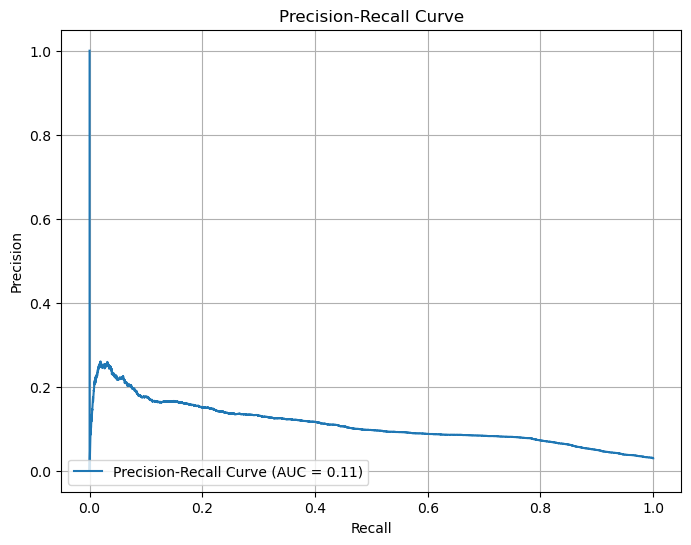

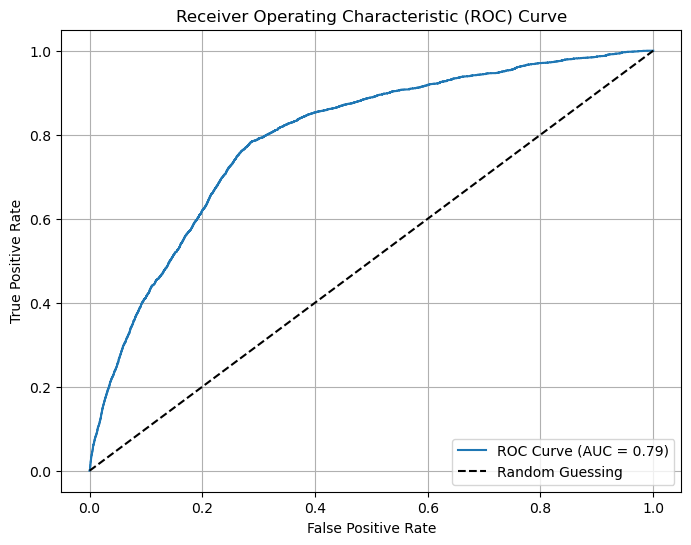

ROC AUC Score: 0.7942
Precision-Recall AUC Score: 0.1096

Best Threshold (based on max F1 on PR curve): 0.0204
Best F1 Score: 0.1836
Precision at best threshold: 0.1329
Recall at best threshold: 0.2972

Classification Report:
               precision    recall  f1-score   support

Non-Fraud (0)       0.98      0.94      0.96    117460
    Fraud (1)       0.13      0.30      0.18      3600

     accuracy                           0.92    121060
    macro avg       0.56      0.62      0.57    121060
 weighted avg       0.95      0.92      0.94    121060


Confusion Matrix:
                  Predicted Non-Fraud  Predicted Fraud
Actual Non-Fraud               110477             6983
Actual Fraud                     2530             1070


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc, roc_curve, roc_auc_score, classification_report, confusion_matrix
import pandas as pd

# --- Re-calculate scores per sequence (if needed, or adapt alignment) ---
# This part assumes you might want a single score per sequence, e.g., the max.
# If you want to use the score of the last timestep, the alignment logic below needs adjustment.

model.eval()
sequence_scores = []
with torch.no_grad():
    # Process test_seq in batches if it's very large
    test_loader_eval = DataLoader(test_seq, batch_size=batch_size*2) # Use larger batch for eval
    for batch in test_loader_eval:
        x = batch.to(device)
        _ = model(x) # Forward pass to populate internal states
        # model.anomaly_score(x) returns scores per position: shape (batch, seq_len)
        # We take the max score across the sequence length dimension for each sequence in the batch
        sc = model.anomaly_score(x).max(dim=1)[0] # Get max score per sequence
        sequence_scores.append(sc.cpu().numpy())

# Concatenate scores from all batches
sequence_scores = np.concatenate(sequence_scores) # Shape: (num_sequences,)

# --- Align scores with original labels ---
# The score for sequence `i` (made from original data i to i+seq_len-1)
# is assigned to the label of the last element in that sequence.
num_sequences = len(sequence_scores)
num_original_test_points = len(X_test_mm) # Or len(Y_test)

# Ensure Y_test is a NumPy array for easier indexing
Y_test_np = Y_test.to_numpy()

# Select the labels corresponding to the end of each sequence
aligned_labels = Y_test_np[seq_len - 1 : num_sequences + seq_len - 1]

# Ensure scores and labels have the same length after alignment
if len(sequence_scores) != len(aligned_labels):
     print(f"Warning: Mismatch in length after alignment. Scores: {len(sequence_scores)}, Labels: {len(aligned_labels)}")
     # Adjust if necessary, e.g., trim the longer one. This might indicate an off-by-one error.
     min_len = min(len(sequence_scores), len(aligned_labels))
     sequence_scores = sequence_scores[:min_len]
     aligned_labels = aligned_labels[:min_len]

print(f"Aligned scores shape: {sequence_scores.shape}")
print(f"Aligned labels shape: {aligned_labels.shape}")

# --- Calculate Precision-Recall Curve ---
precision, recall, thresholds_pr = precision_recall_curve(aligned_labels, sequence_scores)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# --- Calculate ROC Curve ---
fpr, tpr, thresholds_roc = roc_curve(aligned_labels, sequence_scores)
roc_auc = roc_auc_score(aligned_labels, sequence_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Precision-Recall AUC Score: {pr_auc:.4f}")

# --- Find a threshold (Example: Maximize F1-score) ---
# Calculate F1 score for each threshold on the PR curve
f1_scores = (2 * precision * recall) / (precision + recall + 1e-9) # Add epsilon for stability
best_threshold_idx = np.argmax(f1_scores[:-1]) # Exclude the last point (recall=0)
best_threshold = thresholds_pr[best_threshold_idx]
best_f1 = f1_scores[best_threshold_idx]

print(f"\nBest Threshold (based on max F1 on PR curve): {best_threshold:.4f}")
print(f"Best F1 Score: {best_f1:.4f}")
print(f"Precision at best threshold: {precision[best_threshold_idx]:.4f}")
print(f"Recall at best threshold: {recall[best_threshold_idx]:.4f}")

# --- Apply threshold and get classification results ---
predictions = (sequence_scores >= best_threshold).astype(int)

print("\nClassification Report:")
print(classification_report(aligned_labels, predictions, target_names=['Non-Fraud (0)', 'Fraud (1)']))

print("\nConfusion Matrix:")
cm = confusion_matrix(aligned_labels, predictions)
print(pd.DataFrame(cm, index=['Actual Non-Fraud', 'Actual Fraud'], columns=['Predicted Non-Fraud', 'Predicted Fraud']))

CV-optimal threshold = 0.0222,  F1_CV = 0.1658


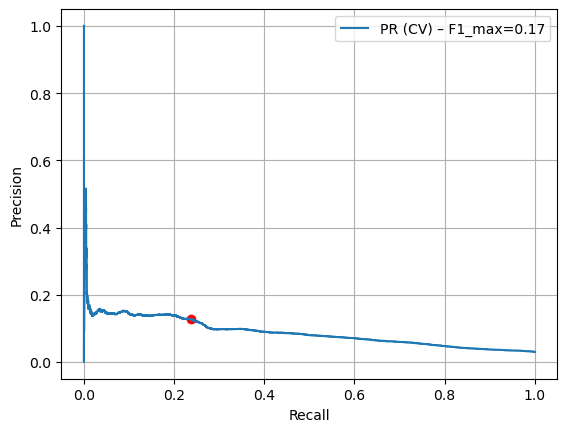

Test  F1: 0.1775890358073545
              precision    recall  f1-score   support

   Non-Fraud       0.98      0.95      0.96    117460
       Fraud       0.14      0.26      0.18      3600

    accuracy                           0.93    121060
   macro avg       0.56      0.60      0.57    121060
weighted avg       0.95      0.93      0.94    121060

        Pred 0  Pred 1
True 0  111619    5841
True 1    2680     920
99.5th percentile threshold = 0.0498,  Test F1 = 0.06947069943289225


In [22]:
# --- 1) Compute CV‐set anomaly scores (max‐agg) ---
cv_loader_eval = DataLoader(cv_seq, batch_size=batch_size*2)
sequence_scores_cv = []
model.eval()
with torch.no_grad():
    for batch in cv_loader_eval:
        x = batch.to(device)
        _ = model(x)
        sc = model.anomaly_score(x).max(dim=1)[0]       # (batch,)
        sequence_scores_cv.append(sc.cpu().numpy())
sequence_scores_cv = np.concatenate(sequence_scores_cv)

aligned_cv = Y_cv.to_numpy()[seq_len-1 : seq_len-1 + len(sequence_scores_cv)]

# --- 2) Find best threshold on CV by max F1 ---
from sklearn.metrics import precision_recall_curve, f1_score
prec_cv, rec_cv, thr_cv = precision_recall_curve(aligned_cv, sequence_scores_cv)
f1_cv = 2 * prec_cv * rec_cv / (prec_cv + rec_cv + 1e-9)
best_idx = np.nanargmax(f1_cv[:-1])
opt_threshold = thr_cv[best_idx]
print(f"CV-optimal threshold = {opt_threshold:.4f},  F1_CV = {f1_cv[best_idx]:.4f}")

# Optional: plot PR‐curve on CV
import matplotlib.pyplot as plt
plt.plot(rec_cv, prec_cv, label=f'PR (CV) – F1_max={f1_cv[best_idx]:.2f}')
plt.scatter(rec_cv[best_idx], prec_cv[best_idx], c='red')
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.legend(); plt.grid(); plt.show()

# --- 3) Apply CV threshold on TEST set ---
pred_test = (sequence_scores >= opt_threshold).astype(int)
print("Test  F1:", f1_score(aligned_labels, pred_test))
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(aligned_labels, pred_test,
                            target_names=['Non-Fraud','Fraud']))
print(pd.DataFrame(confusion_matrix(aligned_labels, pred_test),
                   index=['True 0','True 1'],
                   columns=['Pred 0','Pred 1']))

# --- 4) Alternative: percentile‐based threshold ---
pct = 99.5
thr_pct = np.percentile(sequence_scores_cv, pct)
print(f"{pct}th percentile threshold = {thr_pct:.4f}, ",
      "Test F1 =",
      f1_score(aligned_labels, (sequence_scores>=thr_pct).astype(int)))